201805032 - Ardıl Silan Aydın
201805016 - Beril Kartal
201805060 - Elif Yılmaz
201805017 - Neslihan Özdil
201805045 - Orhan Gazi Barak
201805040 - Yusuf Çelikkıran

creating new features

In [6]:
import pandas as pd

# Veri setini yükle
df = pd.read_csv('BalanceSheetDataSet.csv')

# Yeni özelliklerin oluşturulması
df['Net Nakit Akışı'] = df['Nakit ve Nakit Benzerlerindeki Net Artış (Azalış)'] - df['Yabancı Para Çevrim Farklarının Etkisinden Önce Nakit ve Nakit Benzerlerindeki Net Artış (Azalış)']
df['Ortaklık İşlemlerine İlişkin Nakit Akışları'] = df['İştiraklerin ve/veya İş Ortaklıklarının Pay Satışı veya Sermaye Azaltımı Sebebiyle Oluşan Nakit Girişleri'] - df['İştiraklar ve/veya İş Ortaklıkları Pay Alımı veya Sermaye Artırımı Sebebiyle Oluşan Nakit Çıkışları']
df['Gayrimenkul İşlemlerine İlişkin Nakit Akışları'] = df['Yatırım Amaçlı Gayrimenkul Satımından Kaynaklanan Nakit Girişleri'] - df['Yatırım Amaçlı Gayrimenkul Alımından Kaynaklanan Nakit Çıkışları']
df['Borçlanma ve Borç Ödemelerine İlişkin Net Nakit Akışı'] = df['Borçlanmadan Kaynaklanan Nakit Girişleri'] - df['Borç Ödemelerine İlişkin Nakit Çıkışları']

# Yeni veri setini kaydet
df.to_csv('BalanceSheetwithNewFeatures.csv', index=False)
df

,ŞirketID,yıl,ay,Dönem Net Kar/Zararı,Nakit ve Nakit Benzerleri,Finansal Yatırımlar,Ticari Alacaklar,Finans Sektörü Faaliyetlerinden Alacaklar,Türkiye Cumhuriyet Merkez Bankası Hesabı,Diğer Alacaklar,...,Alınan Faiz.2,Vergi İadeleri (Ödemeleri).2,Diğer Nakit Girişleri (Çıkışları).2,Yabancı Para Çevrim Farklarının Etkisinden Önce Nakit ve Nakit Benzerlerindeki Net Artış (Azalış),Yabancı Para Çevrim Farklarının Nakit ve Nakit Benzerleri Üzerindeki Etkisi,Nakit ve Nakit Benzerlerindeki Net Artış (Azalış),Net Nakit Akışı,Ortaklık İşlemlerine İlişkin Nakit Akışları,Gayrimenkul İşlemlerine İlişkin Nakit Akışları,Borçlanma ve Borç Ödemelerine İlişkin Net Nakit Akışı
0,0,2023,6,1250739407,1991341669,331419233,2841260345,0,0,457869317,...,210852503,0,0,100010510,0,100010510,0,0,0,868396911
1,0,2023,3,1199338377,4653773120,537792194,3608141170,0,0,403658672,...,93344978,0,0,2762441961,0,2762441961,0,0,0,309997980
2,0,2022,12,641094424,1891331159,2263690,4191875205,0,0,650113184,...,263376251,0,0,-3465422908,0,-3465422908,0,0,0,4485677746
3,0,2022,9,2174336792,4125465975,97688988,2894582588,0,0,353997927,...,199711970,0,0,-1231288092,0,-1231288092,0,0,0,2473189233
4,0,2022,6,2392368837,5892517617,275480512,2691896950,0,0,290672574,...,104987816,0,0,535763550,0,535763550,0,0,0,1936820697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,24,2017,6,3831532000,15910549000,0,13546236000,1903514000,0,1417849000,...,515543000,0,-2588000,-1161954000,-6692000,-1168646000,-6692000,11513000,0,53395251000
711,24,2017,3,2541578000,18888512000,0,12361763000,1821675000,0,1542169000,...,225112000,0,-2588000,1534424000,322272000,1856696000,322272000,4900000,0,31253109000
712,24,2016,12,1124520000,16996921000,0,11417798000,1887963000,0,1109391000,...,773206000,0,-98780000,4253376000,2011847000,6265223000,2011847000,4701000,0,95251190000
713,24,2016,9,3459993000,17593453000,0,10119146000,1755819000,0,1058605000,...,560014000,0,-98780000,6568409000,341704000,6910113000,341704000,5560000,0,70110907000


Standardization

In [8]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Veri setini .csv dosyasından oku
veri = pd.read_csv('BalanceSheetwithNewFeatures.csv')

# Separate input features and output (prediction)
X = veri.drop('Dönem Net Kar/Zararı', axis=1)  # Giriş özellikleri
y = veri['Dönem Net Kar/Zararı']  # Çıkış (tahmin)

# Giriş özelliklerini standartlaştır
scaler_input = StandardScaler()
X_scaled = scaler_input.fit_transform(X)

# Çıkışı (tahmini) standartlaştır
scaler_output = StandardScaler()
y_scaled = scaler_output.fit_transform(y.values.reshape(-1, 1))

# Standartlaştırılmış çıktıyı tekrar 1D dizisine dönüştür
y_scaled = y_scaled.flatten()

# Standartlaştırılmış giriş özelliklerini göster
print("Standartlaştırılmış Giriş Özellikleri:")
print(X_scaled)

# Standartlaştırılmış çıktıyı (tahmini) göster
print("\nStandartlaştırılmış Çıkış (Tahmin):")
print(y_scaled)

# Yeni veri setini oluştur
yeniveriseti = pd.DataFrame(X_scaled, columns=X.columns)  # Giriş özellikleri
yeniveriseti['Dönem Net Kar/Zararı'] = y_scaled  # Çıkış (tahmin)

# Yeni veri setini CSV dosyasına kaydet
yeniveriseti.to_csv('BalanceSheet_Standart.csv', index=False)
yeniveriseti

Standartlaştırılmış Giriş Özellikleri:
[[-1.66350458  1.70298465 -0.43226452 ... -0.19147621 -0.15952327
  -0.43492621]
 [-1.66350458  1.70298465 -1.33862562 ... -0.19147621 -0.15952327
  -0.45870897]
 [-1.66350458  1.23212849  1.38045767 ... -0.19147621 -0.15952327
  -0.28086267]
 ...
 [ 1.66272924 -1.59300846  1.38045767 ... -0.1759341  -0.15952327
   3.58492959]
 [ 1.66272924 -1.59300846  0.47409657 ... -0.17309413 -0.15952327
   2.51418026]
 [ 1.66272924 -1.59300846 -0.43226452 ... -0.17572912 -0.15952327
   1.57712479]]

Standartlaştırılmış Çıkış (Tahmin):
[-1.59694779e-01 -1.66906825e-01 -2.45233676e-01 -3.01054223e-02
  4.86514124e-04 -1.39144669e-02 -1.70932496e-01  2.05385659e-01
 -3.54151462e-02 -1.35860502e-01 -2.64853099e-01 -3.26675206e-01
 -3.90817653e-01 -3.72757361e-01 -3.57868553e-01 -3.23869933e-01
 -3.05821601e-01 -3.11310222e-01 -3.25703021e-01 -2.20905419e-01
 -2.66911801e-01 -2.73591542e-01 -3.02203222e-01 -2.99891045e-01
 -3.09860581e-01 -3.20527743e-01 -3.359688

,ŞirketID,yıl,ay,Nakit ve Nakit Benzerleri,Finansal Yatırımlar,Ticari Alacaklar,Finans Sektörü Faaliyetlerinden Alacaklar,Türkiye Cumhuriyet Merkez Bankası Hesabı,Diğer Alacaklar,Müşteri Sözleşmelerinden Doğan Varlıklar,...,Vergi İadeleri (Ödemeleri).2,Diğer Nakit Girişleri (Çıkışları).2,Yabancı Para Çevrim Farklarının Etkisinden Önce Nakit ve Nakit Benzerlerindeki Net Artış (Azalış),Yabancı Para Çevrim Farklarının Nakit ve Nakit Benzerleri Üzerindeki Etkisi,Nakit ve Nakit Benzerlerindeki Net Artış (Azalış),Net Nakit Akışı,Ortaklık İşlemlerine İlişkin Nakit Akışları,Gayrimenkul İşlemlerine İlişkin Nakit Akışları,Borçlanma ve Borç Ödemelerine İlişkin Net Nakit Akışı,Dönem Net Kar/Zararı
0,-1.663505,1.702985,-0.432265,-0.359919,-0.224474,-0.188237,-0.210855,-0.210876,-0.127307,-0.188366,...,0.124862,0.080888,-0.134734,-0.236572,-0.242583,-0.236572,-0.191476,-0.159523,-0.434926,-0.159695
1,-1.663505,1.702985,-1.338626,-0.214545,-0.200594,-0.105270,-0.210855,-0.210876,-0.150253,-0.188366,...,0.124862,0.080888,0.414149,-0.236572,0.166654,-0.236572,-0.191476,-0.159523,-0.458709,-0.166907
2,-1.663505,1.232128,1.380458,-0.365380,-0.262564,-0.042117,-0.210855,-0.210876,-0.045936,-0.188366,...,0.124862,0.080888,-0.869778,-0.236572,-0.790619,-0.236572,-0.191476,-0.159523,-0.280863,-0.245234
3,-1.663505,1.232128,0.474097,-0.243391,-0.251521,-0.182468,-0.210855,-0.210876,-0.171273,-0.188366,...,0.124862,0.080888,-0.409192,-0.236572,-0.447215,-0.236572,-0.191476,-0.159523,-0.366577,-0.030105
4,-1.663505,1.232128,-0.432265,-0.146907,-0.230948,-0.204396,-0.210855,-0.210876,-0.198076,-0.188366,...,0.124862,0.080888,-0.044899,-0.236572,-0.175605,-0.236572,-0.191476,-0.159523,-0.389421,0.000487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,1.662729,-1.122152,-0.432265,0.400099,-0.262825,0.969908,-0.177044,-0.210876,0.279024,-0.188366,...,0.124862,0.068030,-0.394898,-0.238284,-0.437586,-0.238284,-0.153413,-0.159523,1.802244,0.202415
711,1.662729,-1.122152,-1.338626,0.562701,-0.262825,0.841763,-0.178498,-0.210876,0.331645,-0.188366,...,0.124862,0.068030,0.160983,-0.154120,0.027433,-0.154120,-0.175276,-0.159523,0.859188,0.021422
712,1.662729,-1.593008,1.380458,0.459417,-0.262825,0.739637,-0.177321,-0.210876,0.148463,-0.188366,...,0.124862,-0.409883,0.721518,0.278151,0.705059,0.278151,-0.175934,-0.159523,3.584930,-0.177405
713,1.662729,-1.593008,0.474097,0.491989,-0.262825,0.599139,-0.179668,-0.210876,0.126967,-0.188366,...,0.124862,-0.409883,1.198781,-0.149148,0.804184,-0.149148,-0.173094,-0.159523,2.514180,0.150284


Graphics
Instead of printing all the graphs, I used orange to create graphs for the input values that affect the output values the most.

correlation

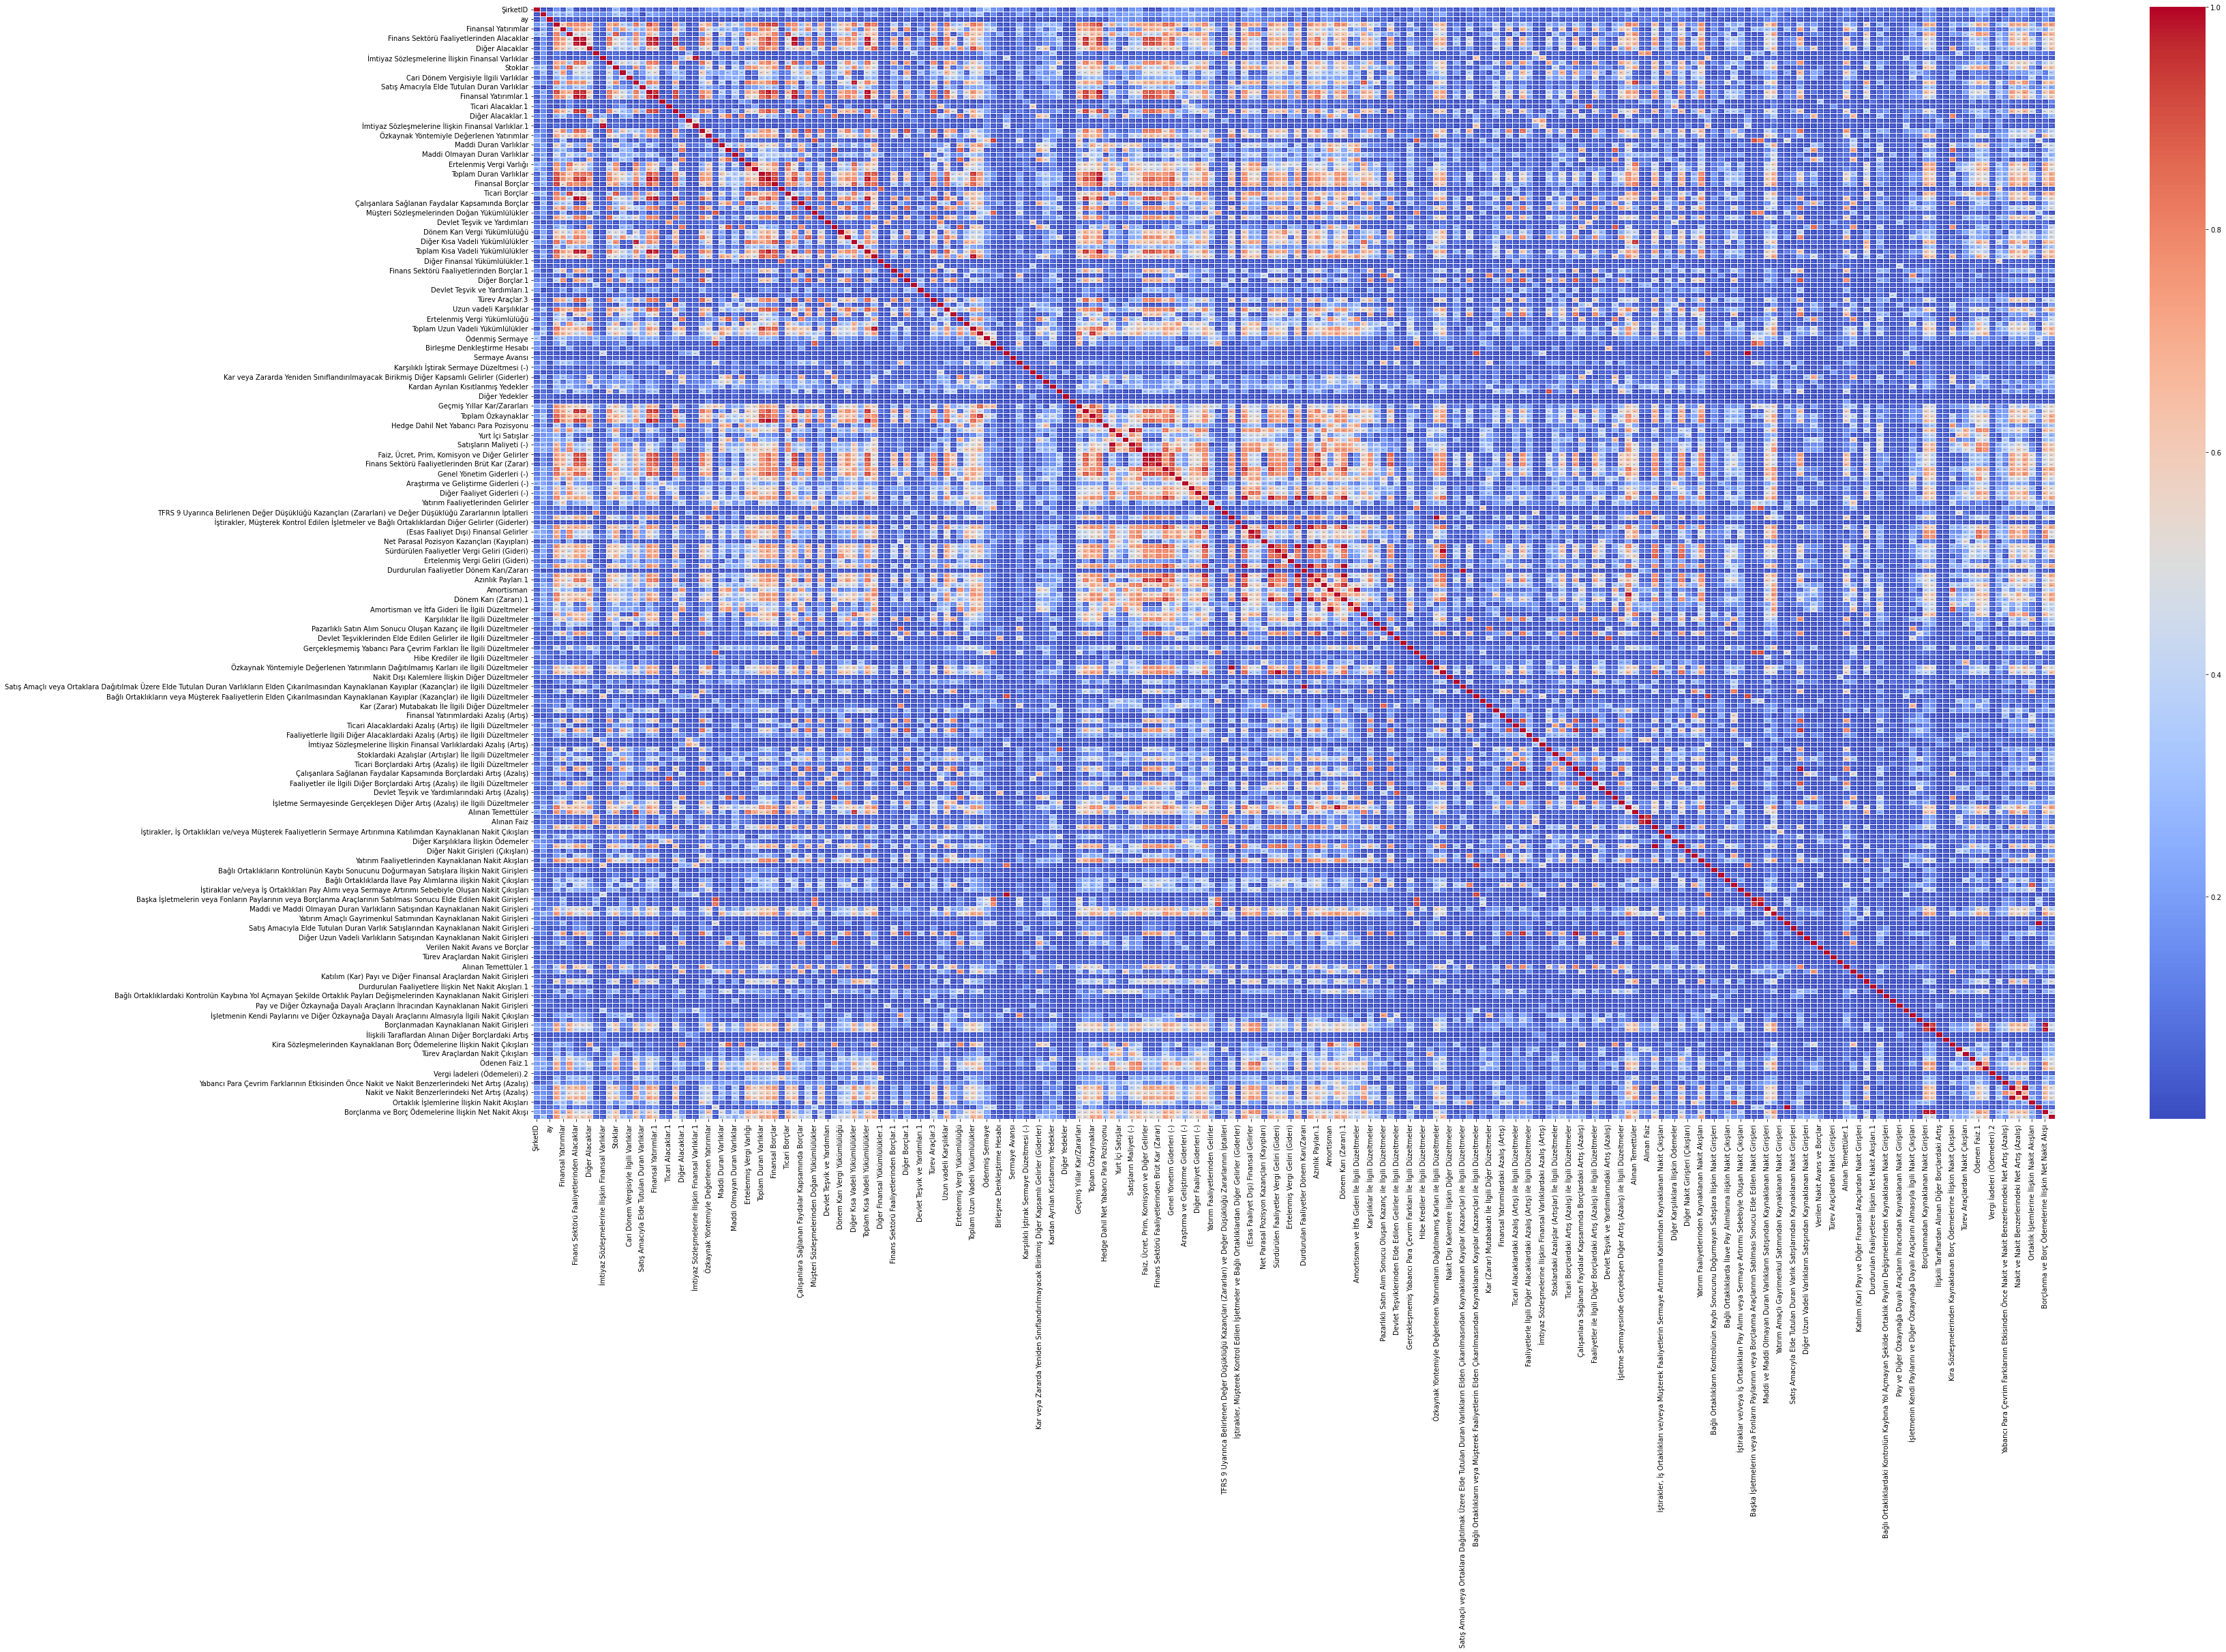

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# final_dataset.csv dosyasını DataFrame'e yükleyin
df = pd.read_csv("BalanceSheet_Standart.csv")

# Sayısal sütunları seçin
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Korelasyon matrisini hesaplayın
correlation_matrix = df[numeric_cols].corr()

# Korelasyon matrisinin her bir öğesinin mutlak değerini alın
absolute_correlation_matrix = correlation_matrix.abs()

# Matristeki değerleri normalize edin (isteğe bağlı olarak)
normalized_correlation_matrix = absolute_correlation_matrix / absolute_correlation_matrix.max().max()

# Korelasyon haritasını çizin
plt.figure(figsize=(50, 30))  # Kutucukları büyütme
sns.heatmap(normalized_correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, annot_kws={"size": 2})  # Kutucuk boyutunu belirleme
plt.show()



Graph Instead of printing all the graphs, I printed the input values and the graphs of the newly added features, which affect the output values.

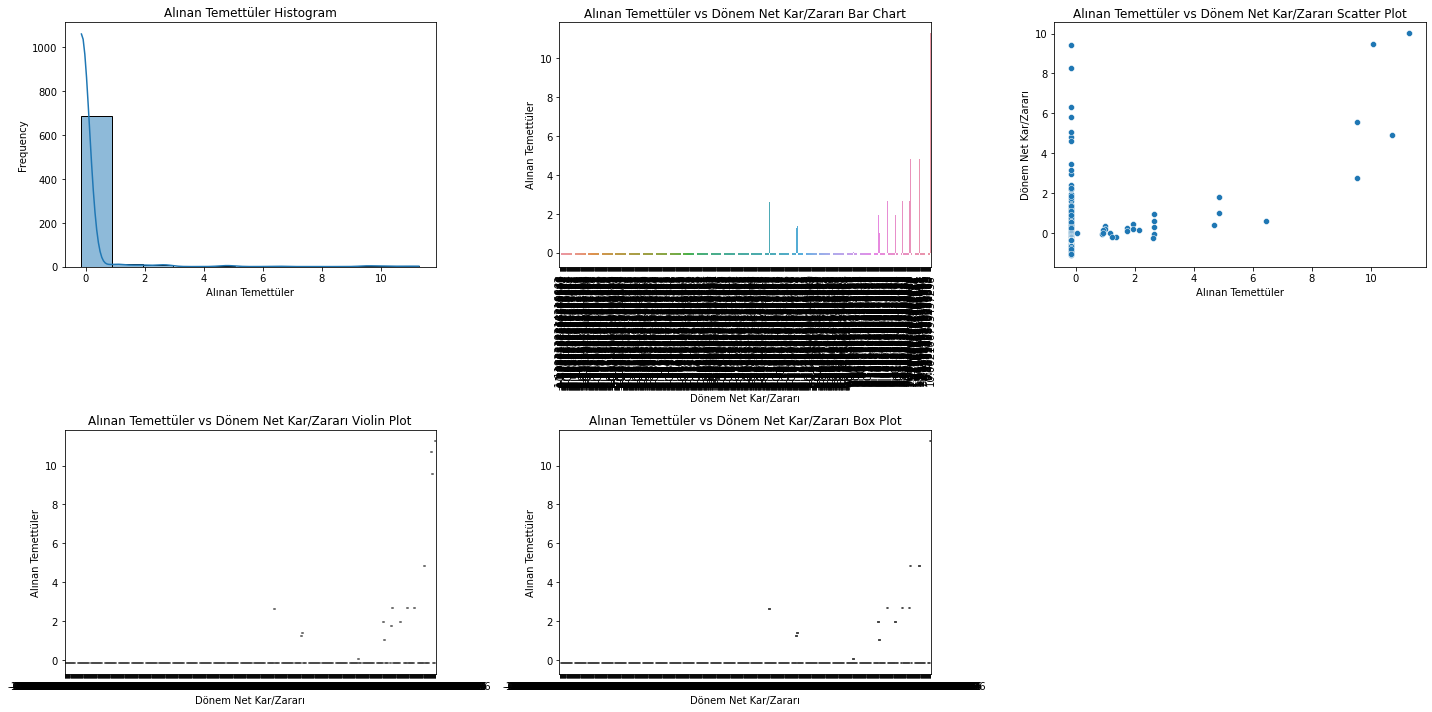

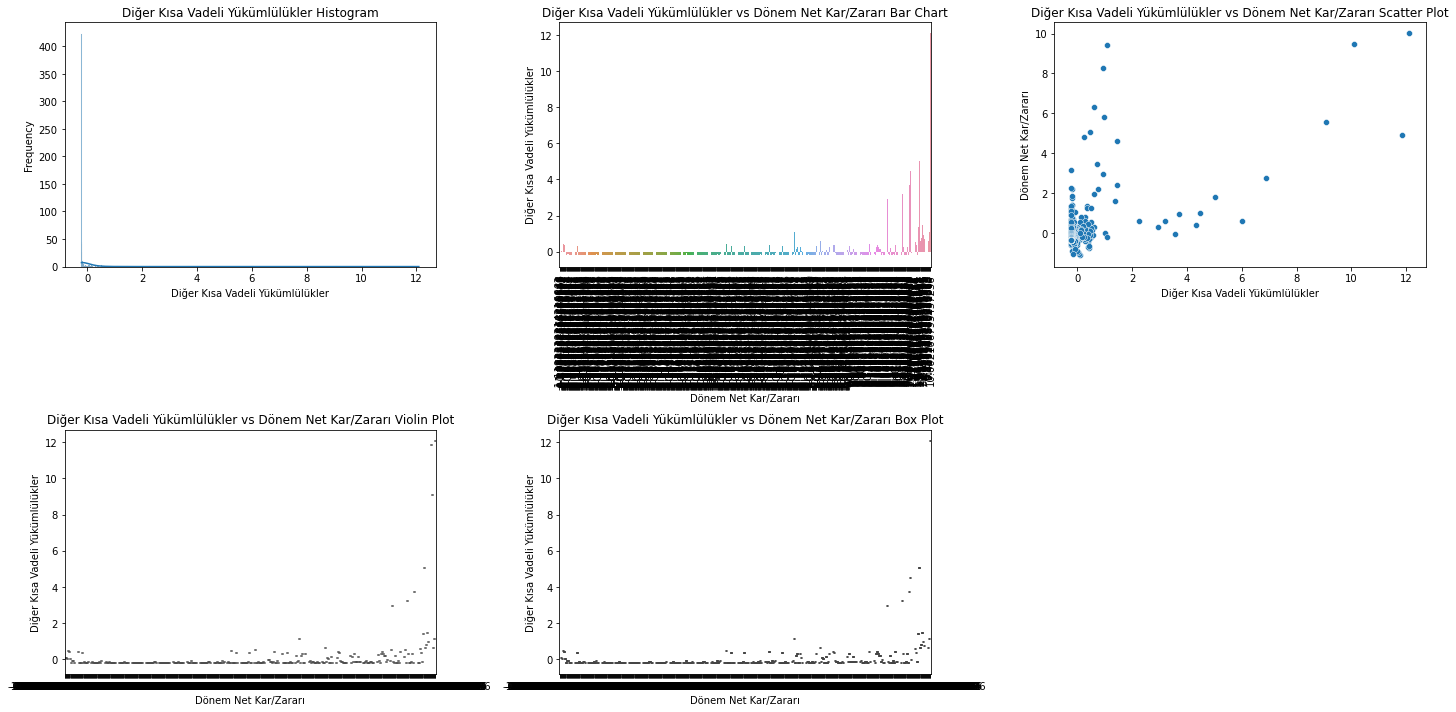

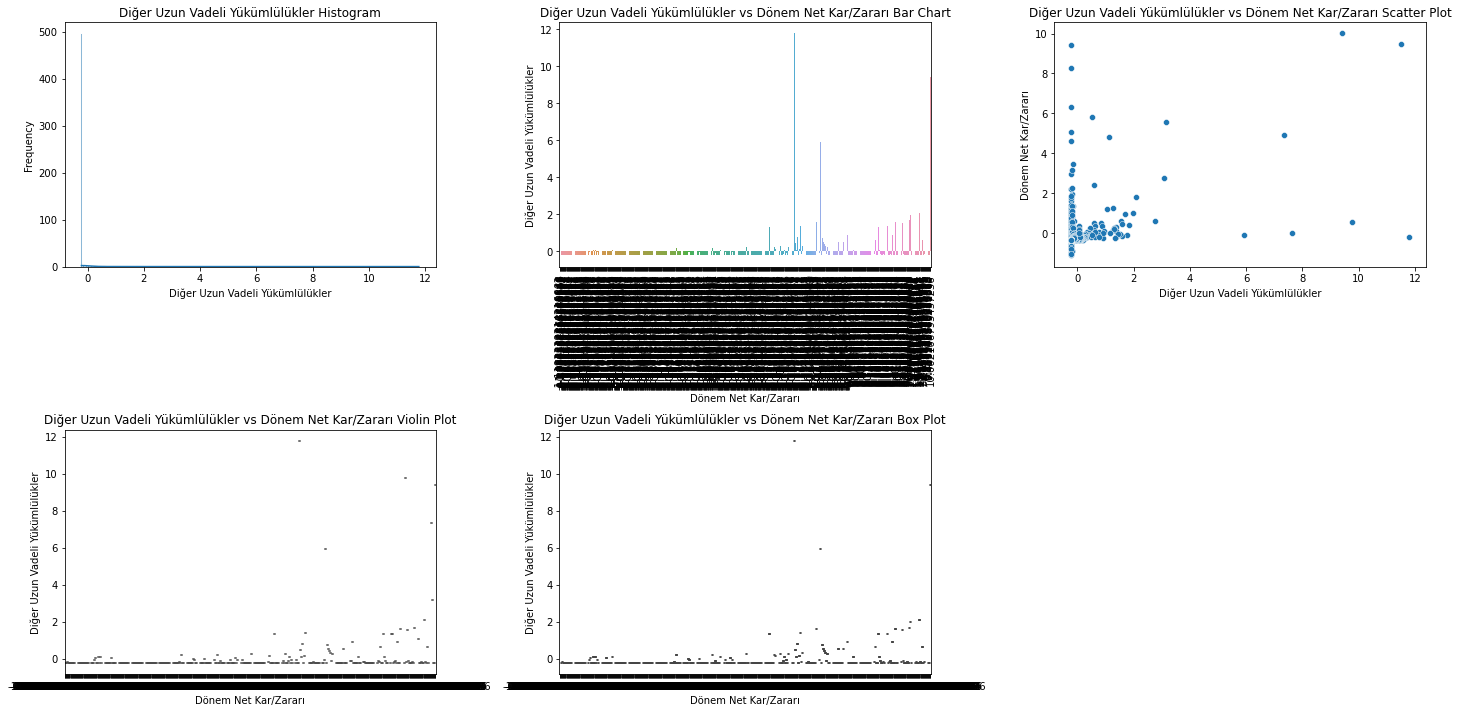

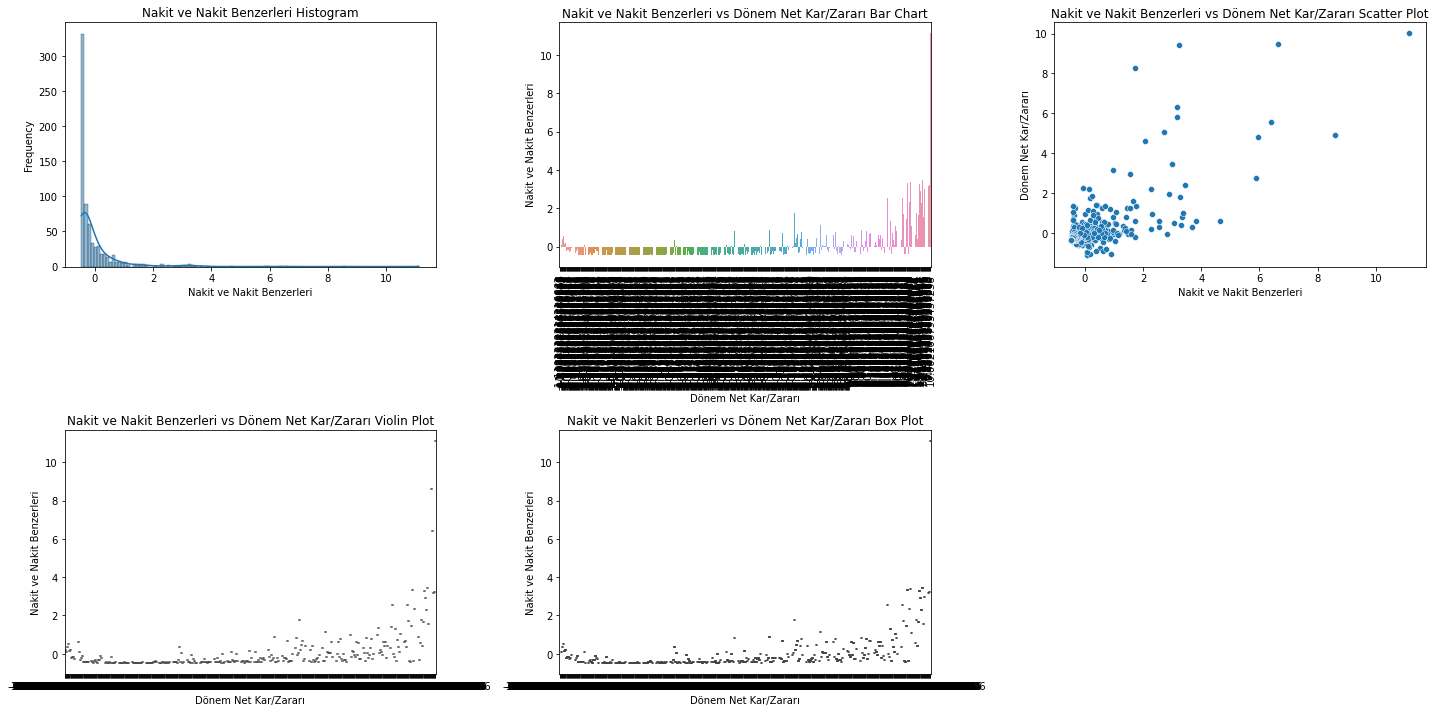

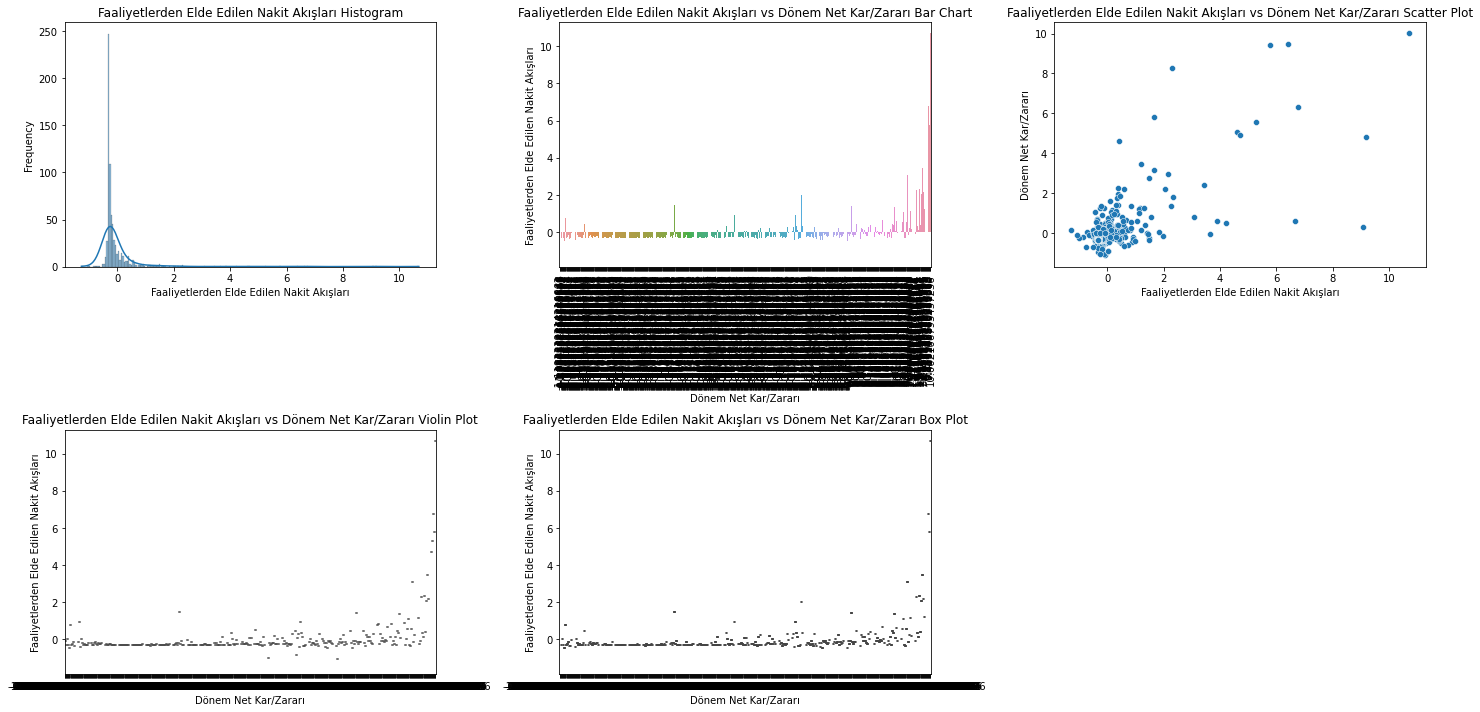

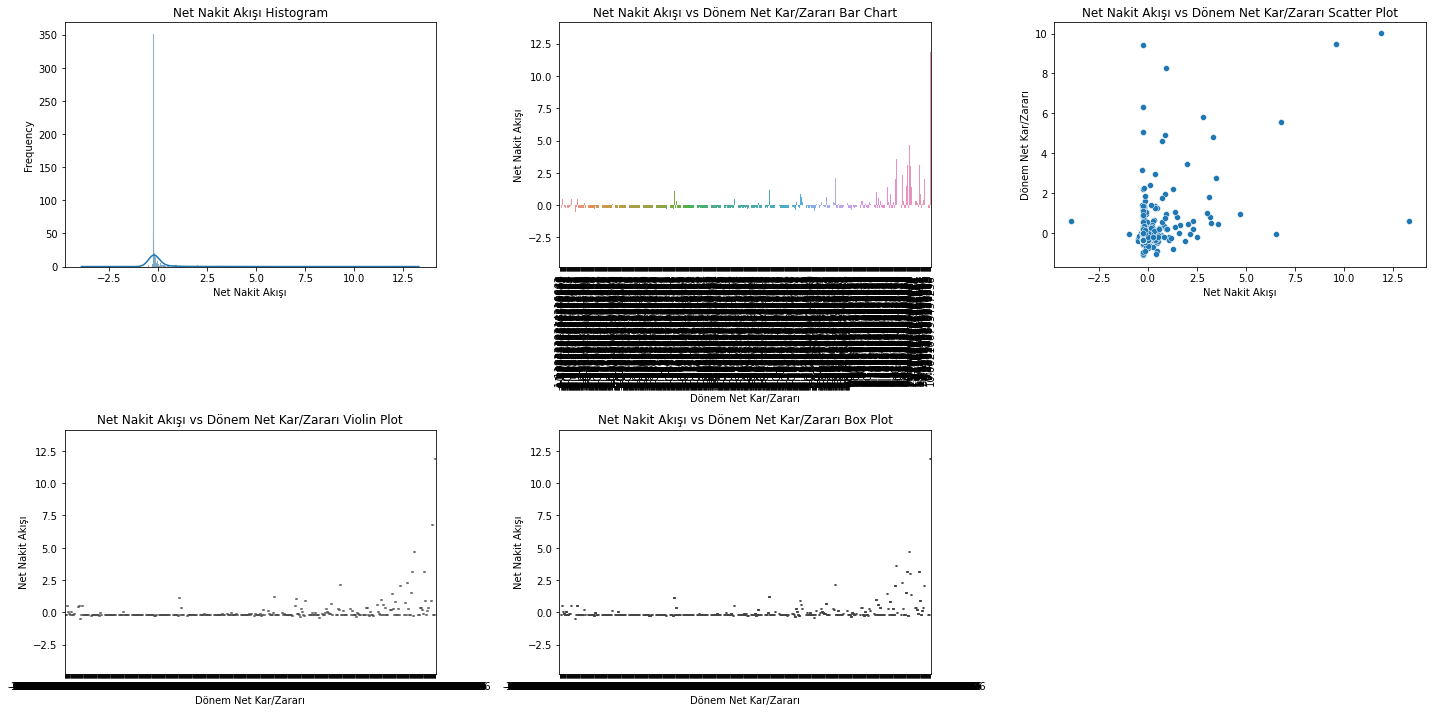

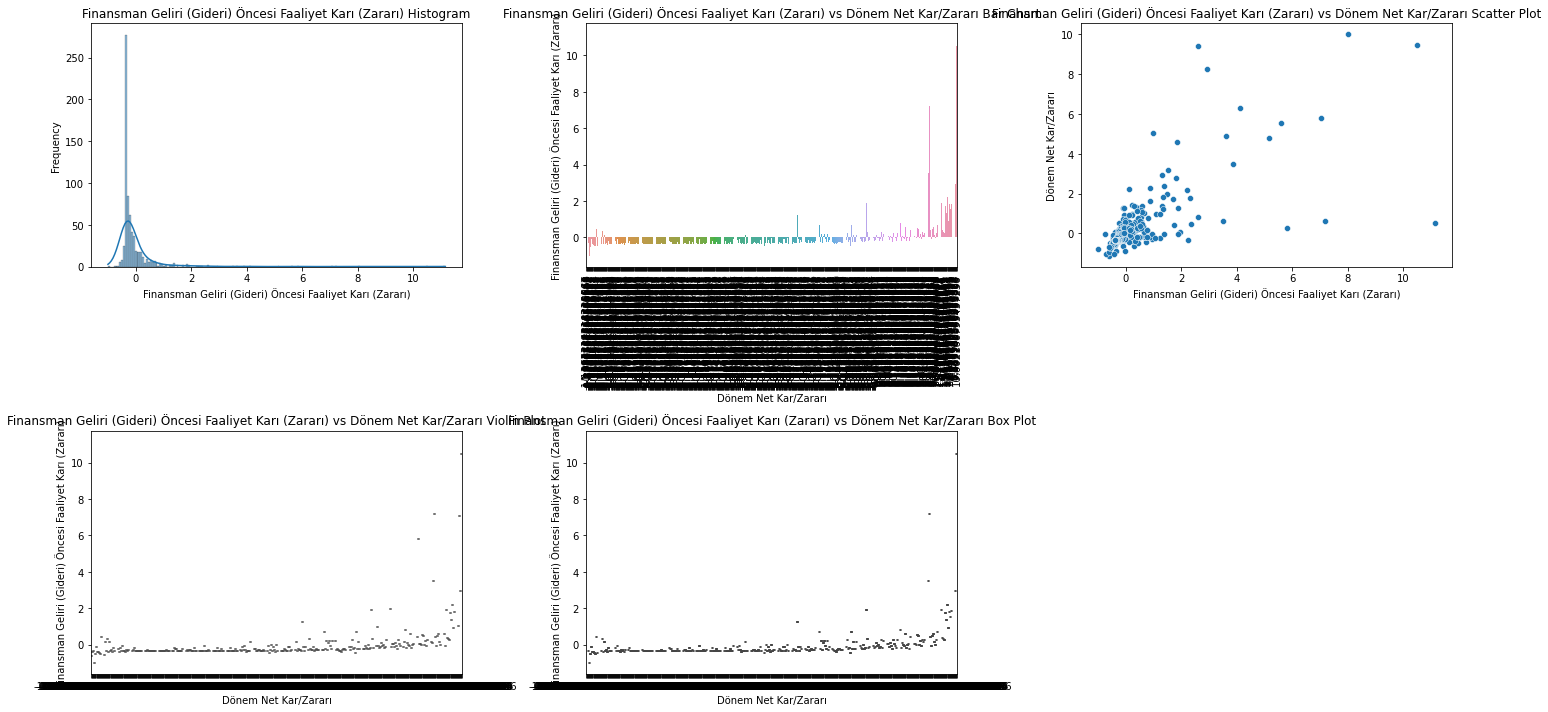

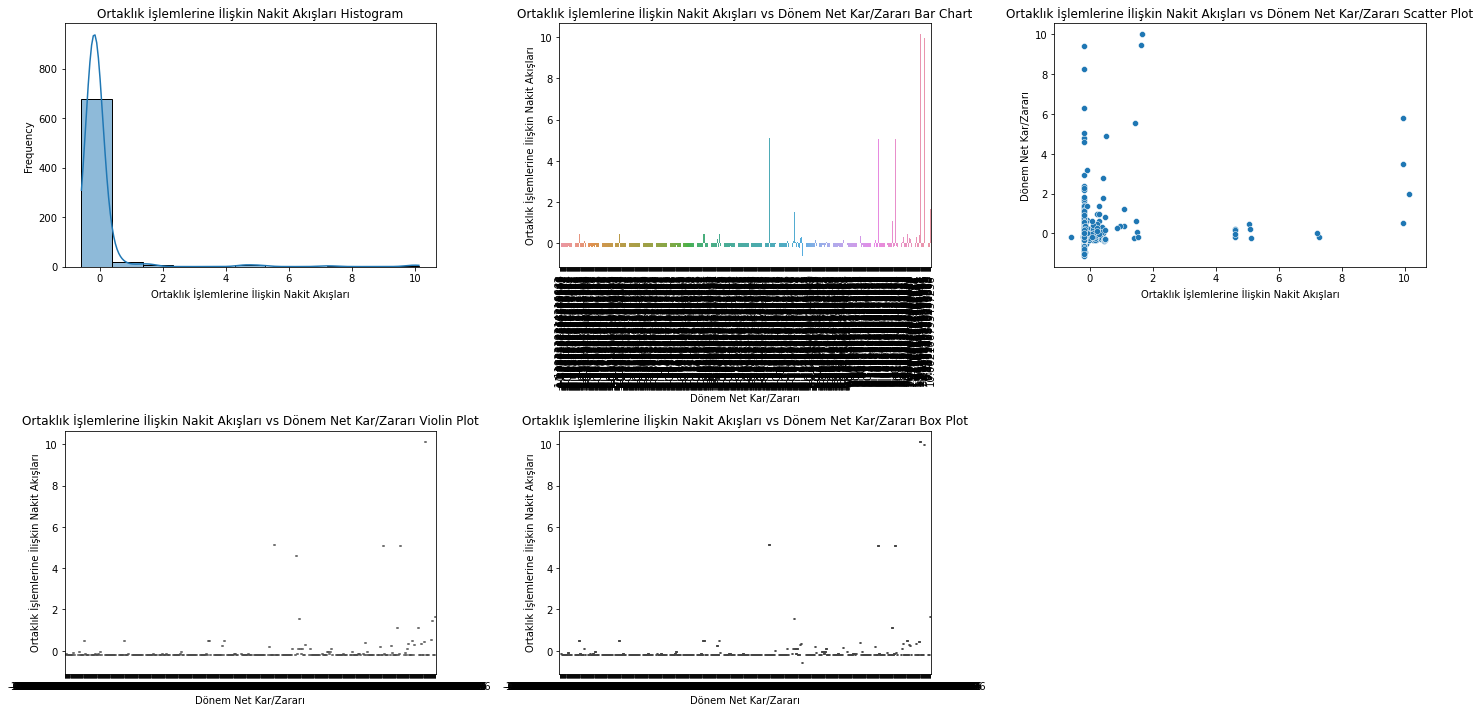

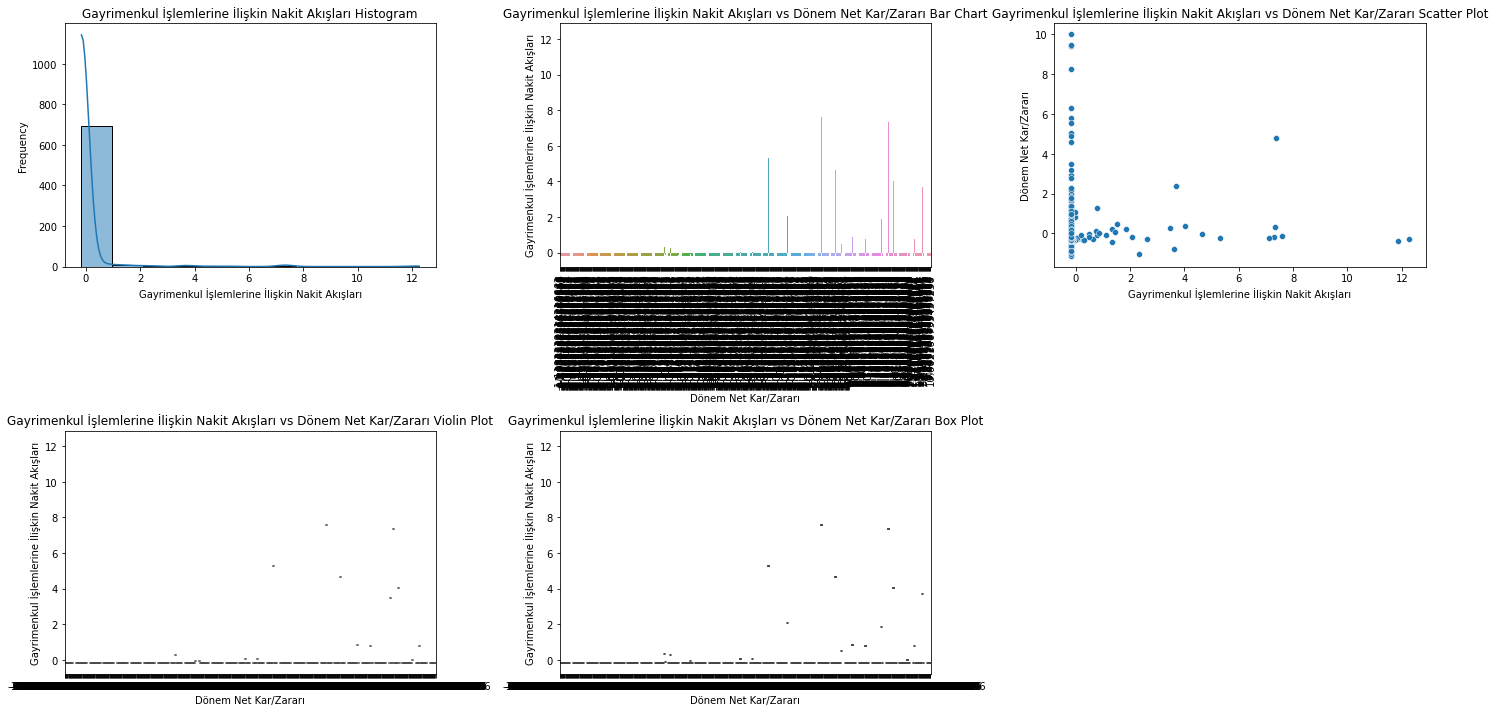

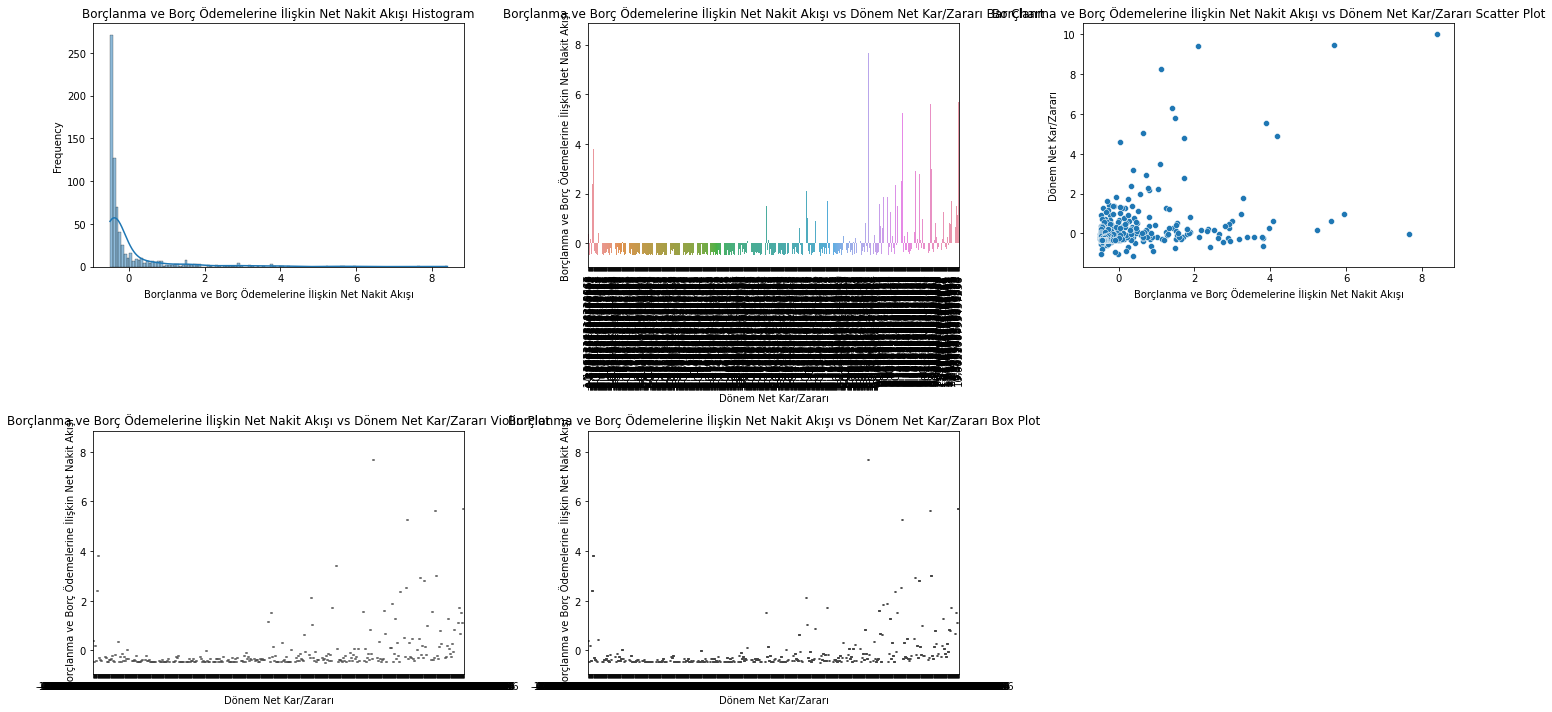

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Veri setini yükleyin
veri = pd.read_csv('BalanceSheet_Standart.csv')

# Girdi özelliklerini belirleyin
girdiler = ['Alınan Temettüler', 'Diğer Kısa Vadeli Yükümlülükler', 'Diğer Uzun Vadeli Yükümlülükler',
            'Nakit ve Nakit Benzerleri', 'Faaliyetlerden Elde Edilen Nakit Akışları', 'Net Nakit Akışı',
            'Finansman Geliri (Gideri) Öncesi Faaliyet Karı (Zararı)','Ortaklık İşlemlerine İlişkin Nakit Akışları',
           'Gayrimenkul İşlemlerine İlişkin Nakit Akışları','Borçlanma ve Borç Ödemelerine İlişkin Net Nakit Akışı']

# Her bir girdi özelliği için grafikler oluşturun
for column in girdiler:
    plt.figure(figsize=(20, 10))
    
    # Histogram
    plt.subplot(2, 3, 1)
    sns.histplot(veri[column], kde=True)
    plt.title(f'{column} Histogram')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    # Bar Chart
    plt.subplot(2, 3, 2)
    sns.barplot(x='Dönem Net Kar/Zararı', y=column, data=veri)
    plt.title(f'{column} vs Dönem Net Kar/Zararı Bar Chart')
    plt.xlabel('Dönem Net Kar/Zararı')
    plt.ylabel(column)
    plt.xticks(rotation=90)
    
    # Scatter Plot
    plt.subplot(2, 3, 3)
    sns.scatterplot(x=column, y='Dönem Net Kar/Zararı', data=veri)
    plt.title(f'{column} vs Dönem Net Kar/Zararı Scatter Plot')
    plt.xlabel(column)
    plt.ylabel('Dönem Net Kar/Zararı')
    
    # Violin Plot
    plt.subplot(2, 3, 4)
    sns.violinplot(x='Dönem Net Kar/Zararı', y=column, data=veri)
    plt.title(f'{column} vs Dönem Net Kar/Zararı Violin Plot')
    plt.xlabel('Dönem Net Kar/Zararı')
    plt.ylabel(column)
    
    # Box Plot
    plt.subplot(2, 3, 5)
    sns.boxplot(x='Dönem Net Kar/Zararı', y=column, data=veri)
    plt.title(f'{column} vs Dönem Net Kar/Zararı Box Plot')
    plt.xlabel('Dönem Net Kar/Zararı')
    plt.ylabel(column)
    
    plt.tight_layout()
    plt.show()


Model

In [1]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score
import numpy as np
import joblib
import pandas as pd

# Yeni veri setini yükle
data = pd.read_csv("BalanceSheet_Standart.csv")

# Her bir şirket ID'sinden eşit sayıda veri almak için veriyi grupla
grouped_data = data.groupby('ŞirketID')
grouped_data = pd.DataFrame(grouped_data.apply(lambda x: x.sample(grouped_data.size().min()).reset_index(drop=True)))

# Bağımsız değişkenler ve hedef değişkeni ayır
X = grouped_data.drop(columns=["Dönem Net Kar/Zararı"])
y = grouped_data["Dönem Net Kar/Zararı"]

# Model tanımları
models = {
    "Simple Linear Regression": LinearRegression(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor(),
    "Gradient Boosting Regression": GradientBoostingRegressor()
}

best_model_name = None
best_score = -1

# Modelleri değerlendir, veri setini bölebilir ve hem ortalama R^2 hem de test R^2 değerlerini yazdır
for name, model in models.items():
    # Veri setini test etmek için bölelim
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)
    
    # Çapraz doğrulama ile modeli değerlendir
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring='r2')
    mean_score = np.mean(scores)
    
    if mean_score > best_score:
        best_score = mean_score
        best_model_name = name
        
    # Modeli eğitim seti üzerinde eğit
    model.fit(X_train, y_train)
    
    # Test R^2 hesapla
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    # Eğitim R^2 hesapla
    y_pred_train = model.predict(X_train)
    r2_train = r2_score(y_train, y_pred_train)
    
    # Sonuçları yazdır
    print(f"{name}: Cross-validated R^2 scores: {scores}")
    print(f"{name}: Average Cross-validated R^2 score: {np.mean(scores)}")
    print(f"{name}: Test R^2 score = {r2}")
    print(f"{name}: Train R^2 score = {r2_train}")
    print("--------------------------------------")

# En iyi modeli seç
best_model = models[best_model_name]

# En iyi modeli eğitim seti üzerinde eğit
best_model.fit(X_train, y_train)

# En iyi modelin eğitim seti performansını hesapla
y_pred_train_best = best_model.predict(X_train)
r2_train_best = r2_score(y_train, y_pred_train_best)

# En iyi modelin test seti performansını hesapla
y_pred_best = best_model.predict(X_test)
r2_best = r2_score(y_test, y_pred_best)

# En iyi modelin adını ve performansını yazdır
print(f"The best model is: {best_model_name}, Average cross-validation R^2: {best_score}")
print(f"The best model is ({best_model_name}): Train R^2 score = {r2_train_best}, Test R^2 score = {r2_best}")

# En iyi modeli diske kaydet
joblib.dump(best_model, 'Best_Model_Balance_Sheet.pkl')


Simple Linear Regression: Cross-validated R^2 scores: [  0.28484831 -33.48619458   0.55896933   0.40675407  -1.00711672
  -0.89503933  -3.96612144  -0.35218556  -1.75559675  -4.02685361]
Simple Linear Regression: Average Cross-validated R^2 score: -4.423853626703189
Simple Linear Regression: Test R^2 score = -12059952814279.258
Simple Linear Regression: Train R^2 score = 0.9833681228187323
--------------------------------------
Decision Tree Regression: Cross-validated R^2 scores: [ 0.95426527  0.58620538  0.77224771  0.56849939  0.60193193  0.78149724
  0.43550667  0.90839217 -0.55302849  0.85884275]
Decision Tree Regression: Average Cross-validated R^2 score: 0.5914360017348645
Decision Tree Regression: Test R^2 score = 0.6159354934362624
Decision Tree Regression: Train R^2 score = 1.0
--------------------------------------
Random Forest Regression: Cross-validated R^2 scores: [ 0.6980319   0.72404014  0.65189613  0.99371556  0.91490943  0.93006777
 -2.77336693  0.9446264  -0.6377039

['Best_Model_Balance_Sheet.pkl']